## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Datasets

In [3]:

try:
    fraud_data = pd.read_csv('../data/Fraud_Data_cleaned.csv')
    ip_to_country = pd.read_csv('../data/IpAddress_to_Country_cleaned.csv')
    creditcard_data = pd.read_csv('../data/creditcard_cleaned.csv')

    # Re-apply the necessary preprocessing steps to ensure consistency for EDA
    fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
    fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
    
    # Convert ip_address to integer as per previous successful step
    fraud_data['ip_address_int'] = fraud_data['ip_address'].round().astype(int)

    ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype(int)
    ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype(int)

    creditcard_data.drop_duplicates(inplace=True)
    
    print("Datasets loaded for EDA.")
except FileNotFoundError as e:
    print(f"Error loading file for EDA: {e}. Please ensure the CSV files are in the data directory.")
    exit()

Datasets loaded for EDA.


## Univariate Analysis

### For Fraud Dataset


--- Starting Exploratory Data Analysis (EDA) ---

1. Univariate Analysis for Fraud_Data.csv:

Descriptive Statistics for Numerical Features:
       purchase_value            age
count   151112.000000  151112.000000
mean        36.935372      33.140704
std         18.322762       8.617733
min          9.000000      18.000000
25%         22.000000      27.000000
50%         35.000000      33.000000
75%         49.000000      39.000000
max        154.000000      76.000000


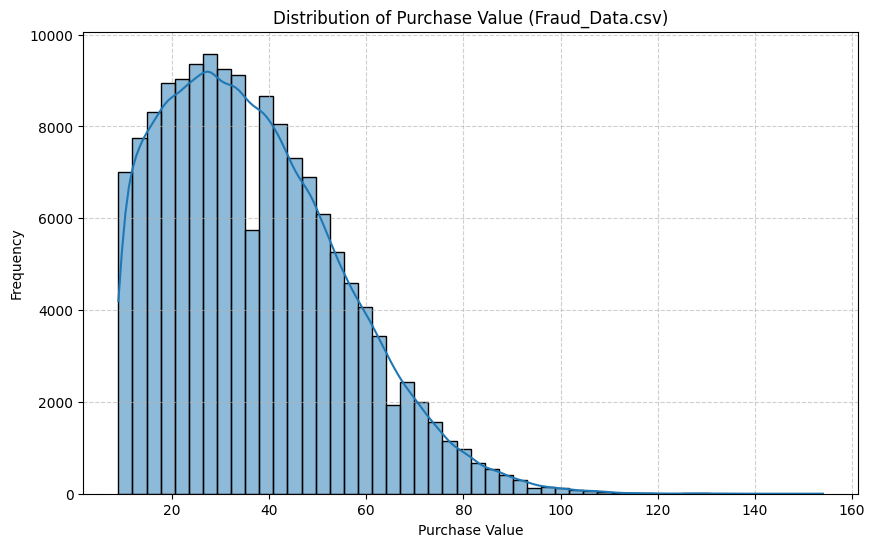

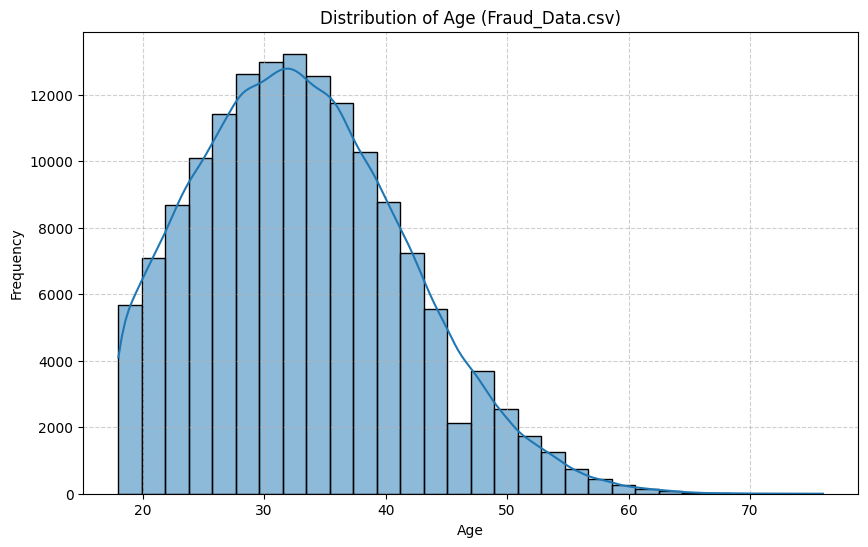

/tmp/ipykernel_328099/4096002902.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x=col, palette='viridis')


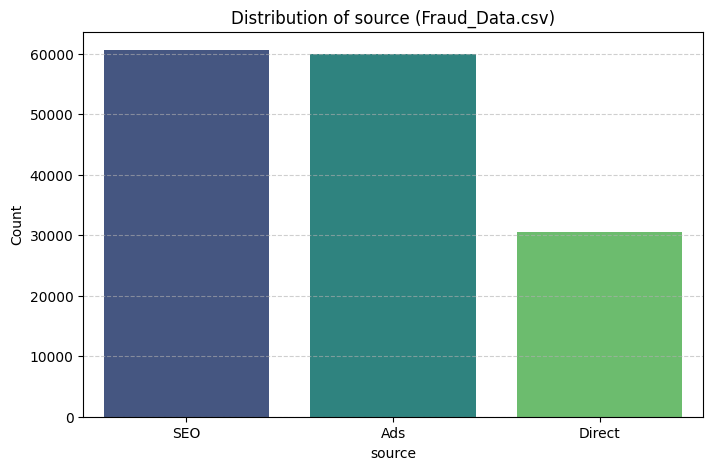

/tmp/ipykernel_328099/4096002902.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x=col, palette='viridis')


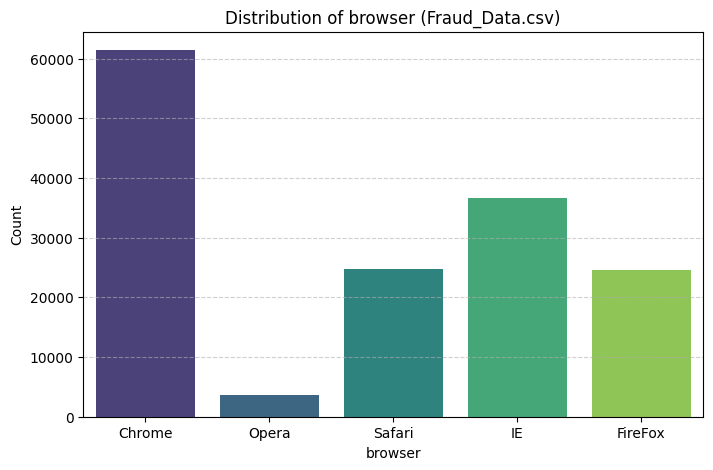

/tmp/ipykernel_328099/4096002902.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x=col, palette='viridis')


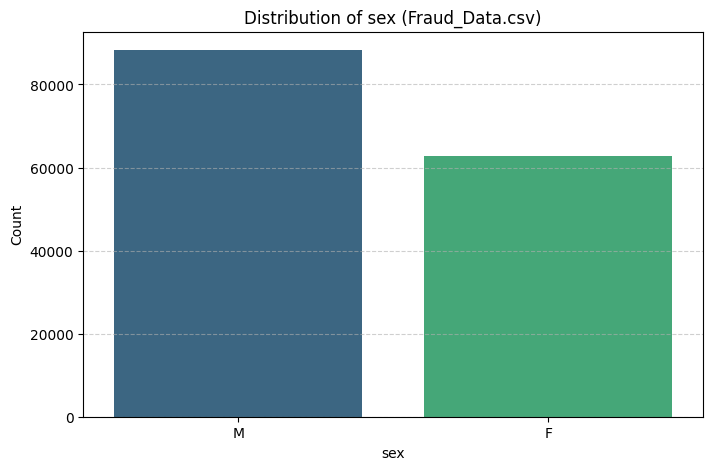

/tmp/ipykernel_328099/4096002902.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='class', palette='coolwarm')


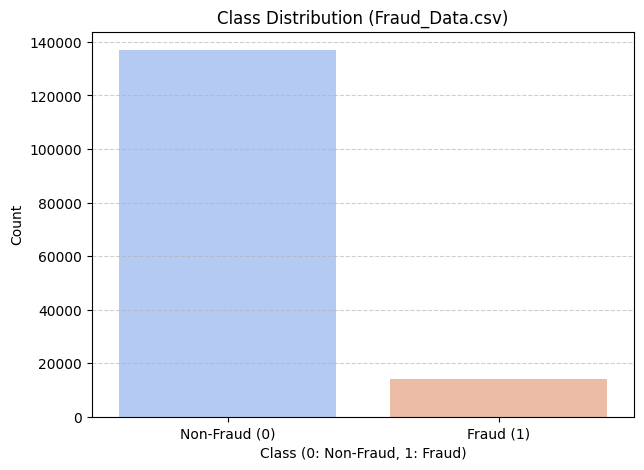


Class distribution for Fraud_Data.csv:
 class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [4]:
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

print("\n1. Univariate Analysis for Fraud_Data.csv:")
print("\nDescriptive Statistics for Numerical Features:")
print(fraud_data[['purchase_value', 'age']].describe())

# Distribution of 'purchase_value'
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value (Fraud_Data.csv)')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of Age (Fraud_Data.csv)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Count plots for Categorical Features
categorical_cols_fraud = ['source', 'browser', 'sex']
for col in categorical_cols_fraud:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=fraud_data, x=col, palette='viridis')
    plt.title(f'Distribution of {col} (Fraud_Data.csv)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Class Imbalance Check for Fraud_Data.csv
plt.figure(figsize=(7, 5))
sns.countplot(data=fraud_data, x='class', palette='coolwarm')
plt.title('Class Distribution (Fraud_Data.csv)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
print("\nClass distribution for Fraud_Data.csv:\n", fraud_data['class'].value_counts(normalize=True))

### For Creditcard Dataset


1. Univariate Analysis for creditcard.csv:

Descriptive Statistics for Numerical Features (Time, Amount):
                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


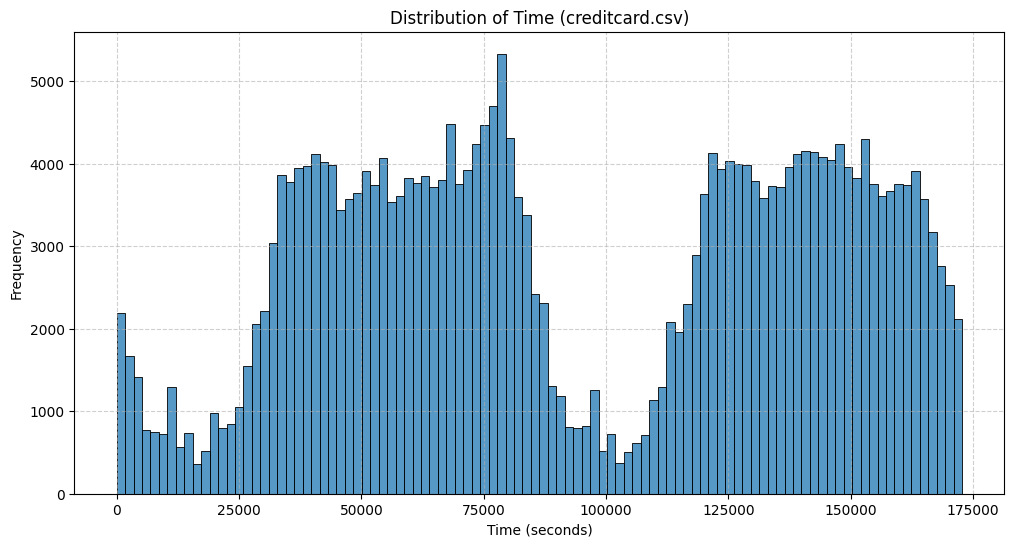

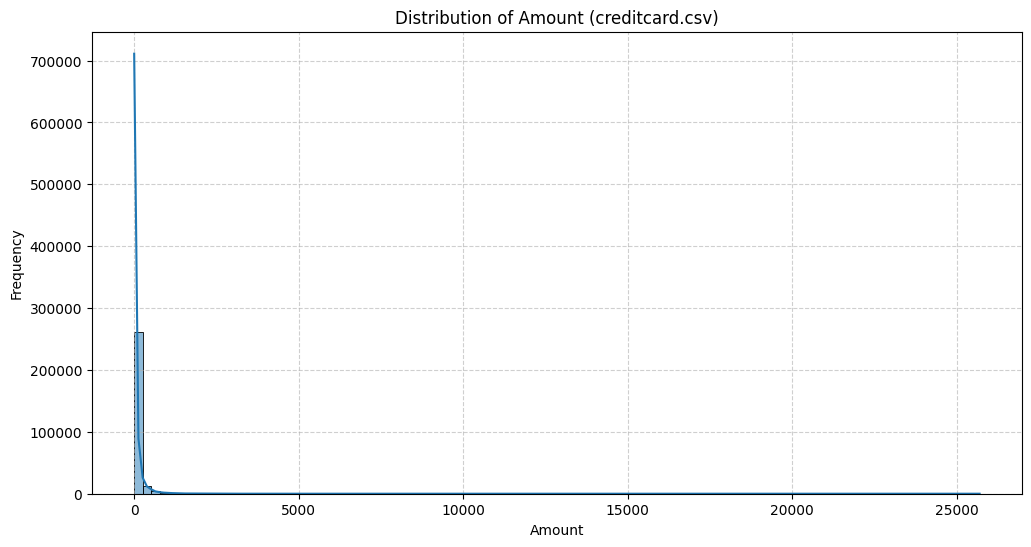

/tmp/ipykernel_328099/2496445492.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=creditcard_data, x='Class', palette='coolwarm')


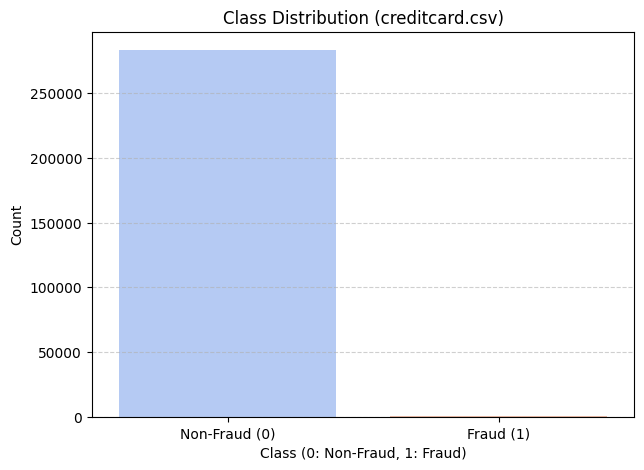


Class distribution for creditcard.csv:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [5]:
print("\n1. Univariate Analysis for creditcard.csv:")
print("\nDescriptive Statistics for Numerical Features (Time, Amount):")
print(creditcard_data[['Time', 'Amount']].describe())

# Distribution of 'Time'
plt.figure(figsize=(12, 6))
sns.histplot(creditcard_data['Time'], bins=100, kde=False)
plt.title('Distribution of Time (creditcard.csv)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Distribution of 'Amount'
plt.figure(figsize=(12, 6))
sns.histplot(creditcard_data['Amount'], bins=100, kde=True)
plt.title('Distribution of Amount (creditcard.csv)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Class Imbalance Check for creditcard.csv
plt.figure(figsize=(7, 5))
sns.countplot(data=creditcard_data, x='Class', palette='coolwarm')
plt.title('Class Distribution (creditcard.csv)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
print("\nClass distribution for creditcard.csv:\n", creditcard_data['Class'].value_counts(normalize=True))

## Bivariate Analysis

### For Fraud Dataset


2. Bivariate Analysis for Fraud_Data.csv:


/tmp/ipykernel_328099/305273138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fraud_data, x='class', y='purchase_value', palette='pastel')


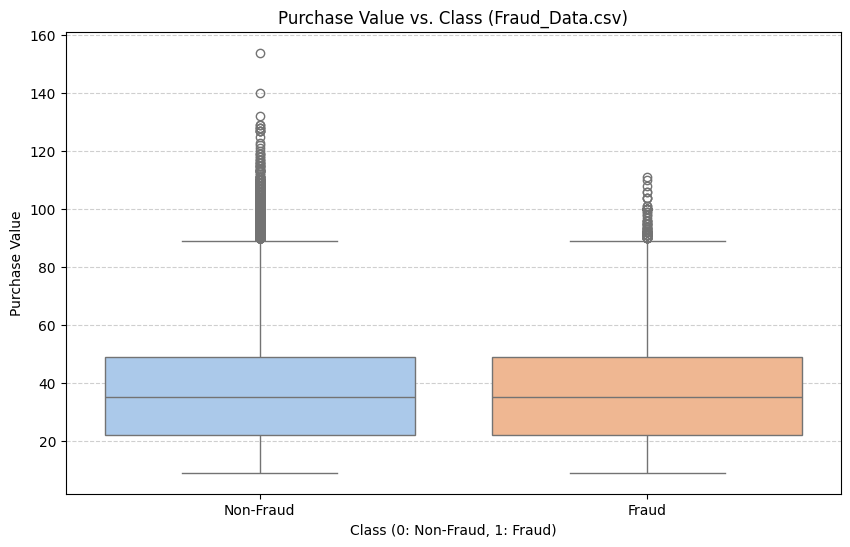

/tmp/ipykernel_328099/305273138.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fraud_data, x='class', y='age', palette='pastel')


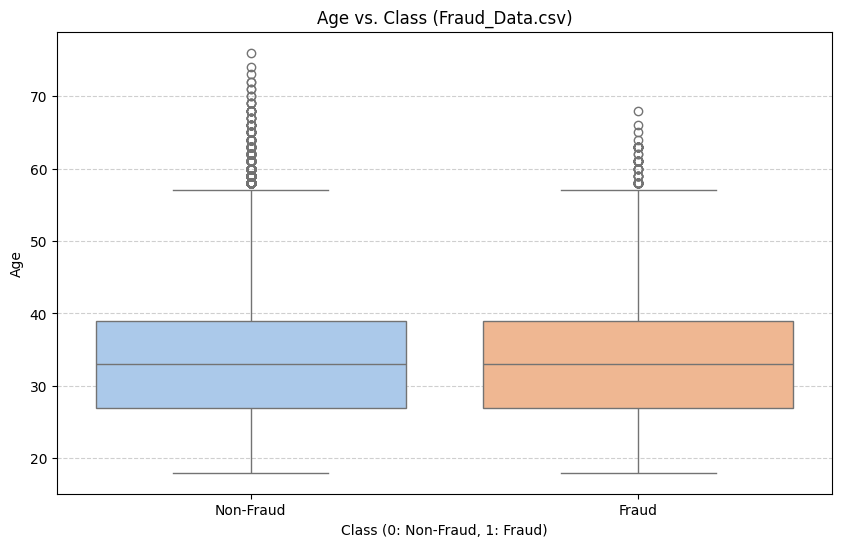

<Figure size 1000x600 with 0 Axes>

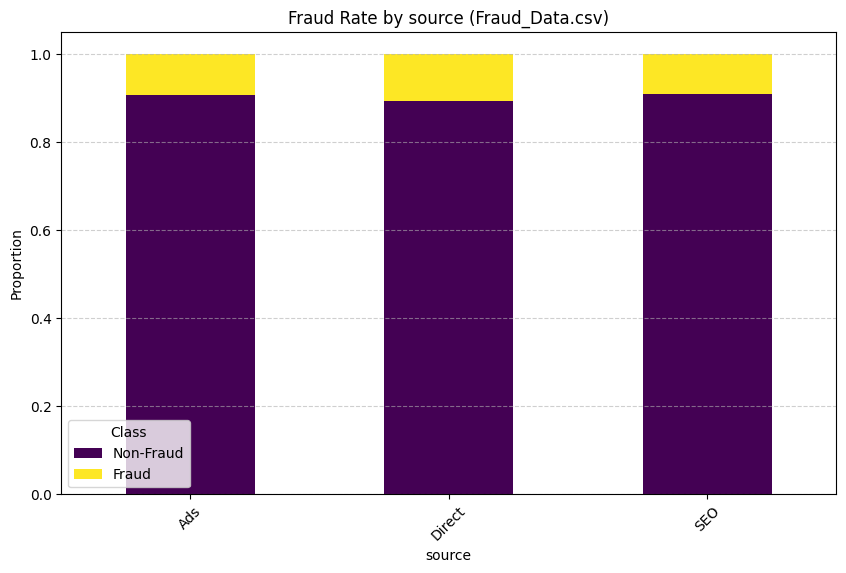


Crosstab for source vs. Class:
 class       0     1
source             
Ads     54368  5513
Direct  27390  3226
SEO     55203  5412


<Figure size 1000x600 with 0 Axes>

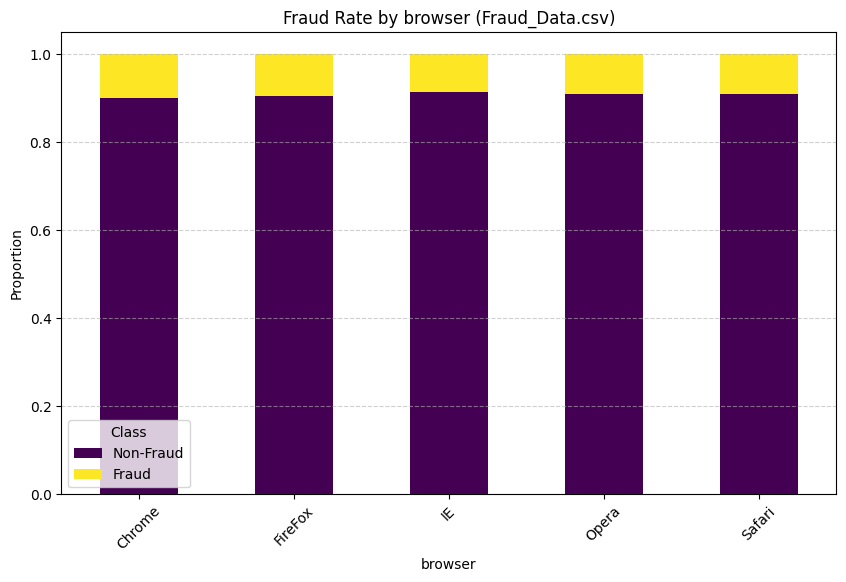


Crosstab for browser vs. Class:
 class        0     1
browser             
Chrome   55363  6069
FireFox  22268  2342
IE       33540  3187
Opera     3348   328
Safari   22442  2225


<Figure size 1000x600 with 0 Axes>

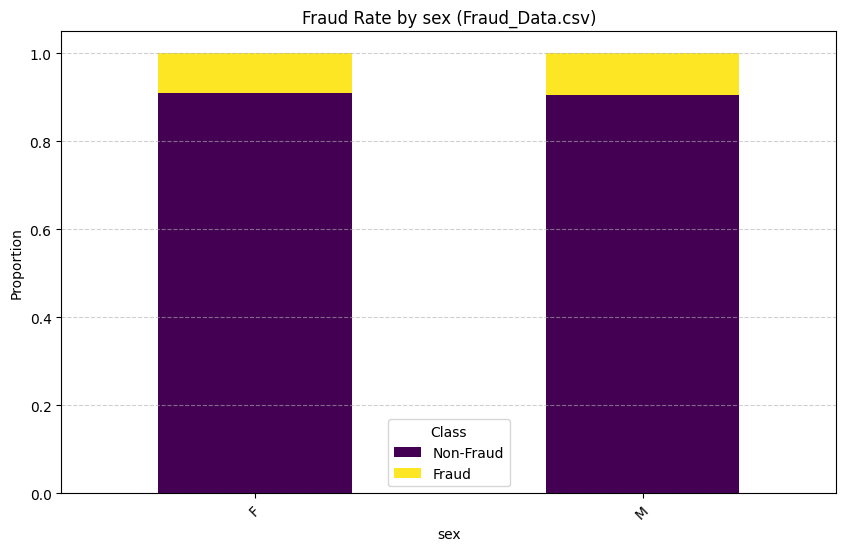


Crosstab for sex vs. Class:
 class      0     1
sex               
F      57102  5717
M      79859  8434


In [7]:
print("\n2. Bivariate Analysis for Fraud_Data.csv:")

# Purchase Value vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=fraud_data, x='class', y='purchase_value', palette='pastel')
plt.title('Purchase Value vs. Class (Fraud_Data.csv)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Purchase Value')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Age vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=fraud_data, x='class', y='age', palette='pastel')
plt.title('Age vs. Class (Fraud_Data.csv)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Categorical features vs. Class
for col in categorical_cols_fraud:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(fraud_data[col], fraud_data['class'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Fraud Rate by {col} (Fraud_Data.csv)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    print(f"\nCrosstab for {col} vs. Class:\n", pd.crosstab(fraud_data[col], fraud_data['class']))


### For Creditcard dataset


2. Bivariate Analysis for creditcard.csv:


/tmp/ipykernel_328099/2109989919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=creditcard_data, x='Class', y='Amount', palette='pastel')


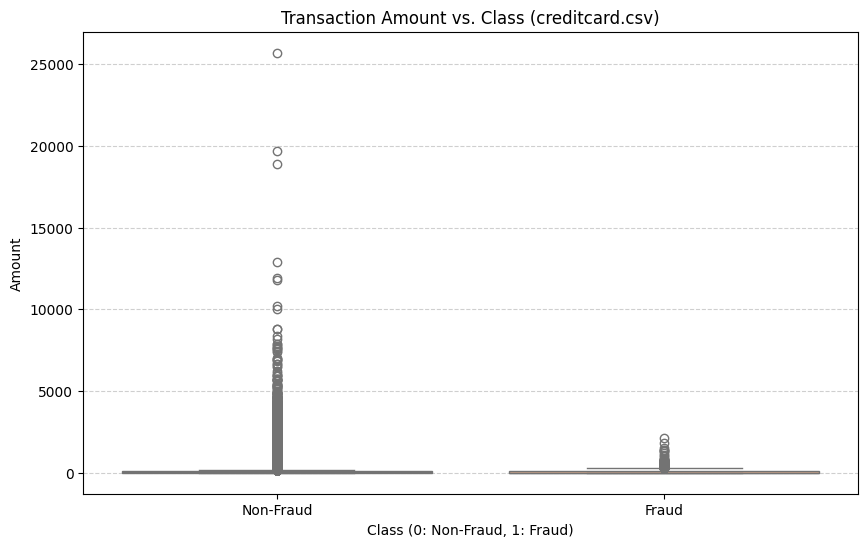

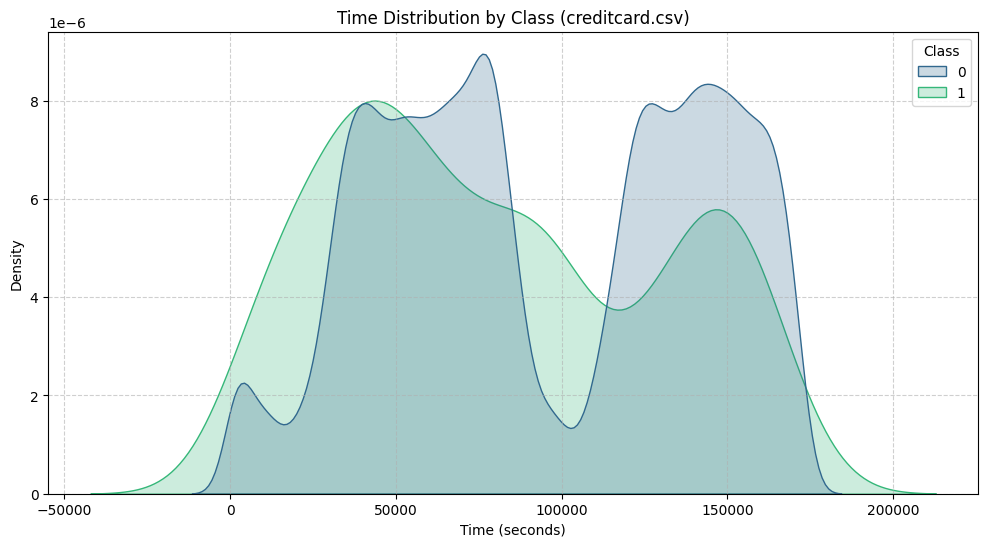

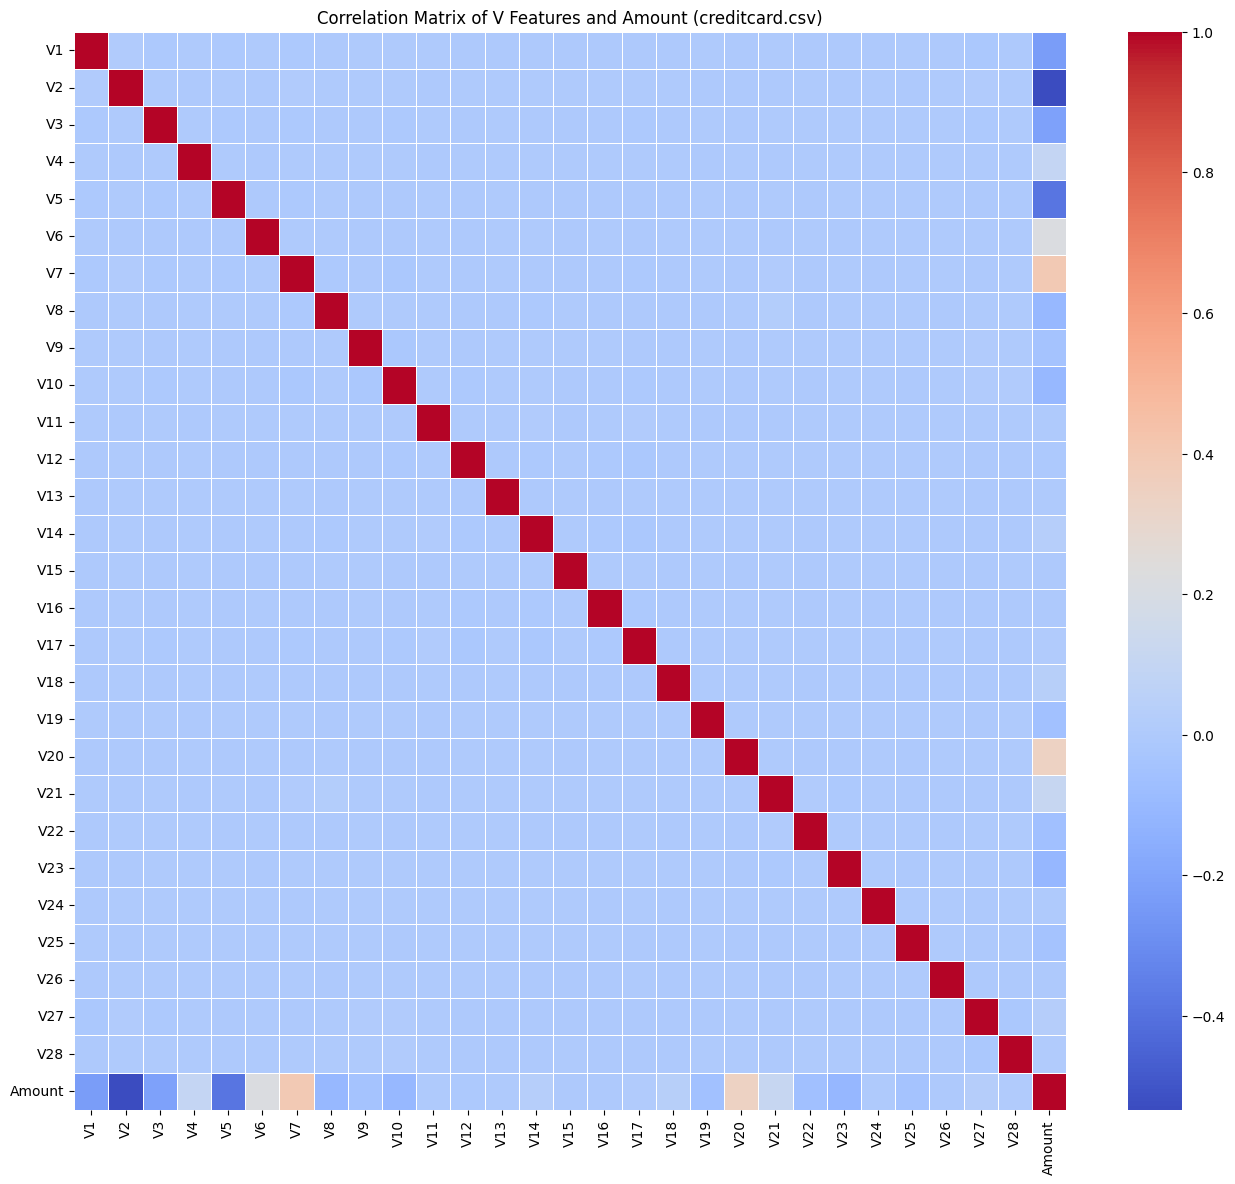


--- EDA Complete ---


In [8]:
print("\n2. Bivariate Analysis for creditcard.csv:")

# Amount vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=creditcard_data, x='Class', y='Amount', palette='pastel')
plt.title('Transaction Amount vs. Class (creditcard.csv)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Time vs. Class (using KDE plot for density comparison)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=creditcard_data, x='Time', hue='Class', fill=True, common_norm=False, palette='viridis')
plt.title('Time Distribution by Class (creditcard.csv)')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Correlation matrix for creditcard.csv (V features and Amount)
# Exclude 'Time' and 'Class' for correlation with V features
correlation_matrix = creditcard_data.drop(columns=['Time', 'Class']).corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of V Features and Amount (creditcard.csv)')
plt.show()

print("\n--- EDA Complete ---")
